<a href="https://colab.research.google.com/github/adrianacupp/NLP_with_Transformers/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch Kaggle dataset into Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset

news-category-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

kaggle.json  News_Category_Dataset_v3.json  news-category-dataset.zip  news_dataset.pkl


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  news-category-dataset.zip
replace News_Category_Dataset_v3.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install datasets

In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

#Load Dataset

In [ ]:
# Specify the file path
file_path = "/content/gdrive/My Drive/Kaggle/News_Category_Dataset_v3.json"

In [ ]:
news_dataset = pd.read_json(file_path , lines=True)

In [ ]:
news_dataset.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


#EDA

In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
news_dataset.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [ ]:
news_dataset.category.value_counts().sort_values(ascending=False)

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

##Merge similar categories

In [ ]:
len(news_dataset.category.unique())

42

In [ ]:
news_dataset.category = news_dataset.category.replace({"HEALTHY LIVING": "WELLNESS",
                                                       "SPORTS":"WELLNESS",
                                                       "QUEER VOICES": "GROUPS VOICES",
                                                       "BLACK VOICES": "GROUPS VOICES",
                                                       "LATINO VOICES": "GROUPS VOICES",
                                                       "WOMEN": "GROUPS VOICES",
                                                       "BUSINESS": "BUSINESS & FINANCES",
                                                       "MONEY": "BUSINESS & FINANCES",
                                                       "WORLDPOST": "WORLD NEWS",
                                                       "MEDIA": "WORLD NEWS",
                                                       "WEIRD NEWS": "WORLD NEWS",
                                                       "GOOD NEWS": "WORLD NEWS",
                                                       "U.S. NEWS": "WORLD NEWS",
                                                       "STYLE": "STYLE & BEAUTY",
                                                       "WEDDINGS": "STYLE & BEAUTY",
                                                       "HOME & LIVING": "STYLE & BEAUTY",
                                                       "IMPACT" : "ENVIRONMENT",
                                                       "GREEN" : "ENVIRONMENT",
                                                       "TASTE" : "FOOD & DRINK",
                                                       "COLLEGE": "EDUCATION",
                                                       "ARTS": "ARTS & CULTURE",
                                                       "CULTURE & ARTS": "ARTS & CULTURE",
                                                       "COMEDY" : "ARTS & CULTURE",
                                                       "ENTERTAINEMENT": "FREE TIME",
                                                       "TRAVEL" : "FREE TIME",
                                                       "PARENTS":"PARENTING",
                                                       "DIVORCE":"PARENTING",
                                                       "SCIENCE": "SCIENCE & TECH",
                                                       "TECH": "SCIENCE & TECH",
                                                       "FIFTY": "MISCELLANEOUS"}
            )


In [ ]:
len(news_dataset.category.unique())

18

In [ ]:
news_dataset.category.unique()

array(['WORLD NEWS', 'ARTS & CULTURE', 'PARENTING', 'SCIENCE & TECH',
       'WELLNESS', 'ENTERTAINMENT', 'POLITICS', 'ENVIRONMENT',
       'EDUCATION', 'CRIME', 'BUSINESS & FINANCES', 'STYLE & BEAUTY',
       'FOOD & DRINK', 'GROUPS VOICES', 'FREE TIME', 'RELIGION',
       'THE WORLDPOST', 'MISCELLANEOUS'], dtype=object)

<Axes: >

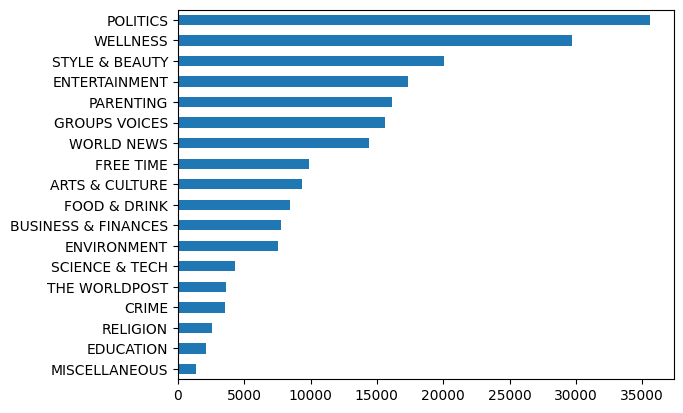

In [ ]:
news_dataset.category.value_counts().sort_values(ascending=True).plot.barh()

In [ ]:
# Calculate the percentage of instances for each category
category_counts = news_dataset['category'].value_counts()
total_instances = len(news_dataset)
percentage_per_category = (category_counts / total_instances) * 100

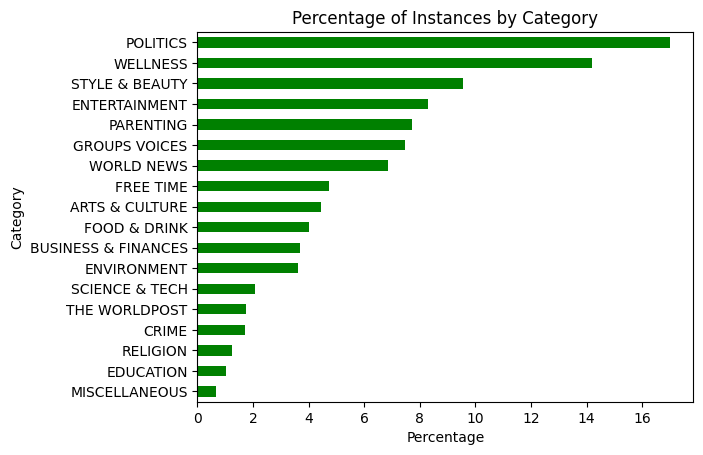

In [ ]:
# Sort the values in ascending order
percentage_per_category = percentage_per_category.sort_values(ascending=True)

# Create a horizontal bar plot
percentage_per_category.plot(kind='barh', color= 'green')

# Set labels and title
plt.title("Percentage of Instances by Category")
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.show()

The dataset is unbalanced towards politics and wellness topics

In [ ]:
#How long are the short_description of articles?
news_dataset['words_per_article_description'] = news_dataset['short_description'].str.split().apply(len)

<Figure size 1200x600 with 0 Axes>

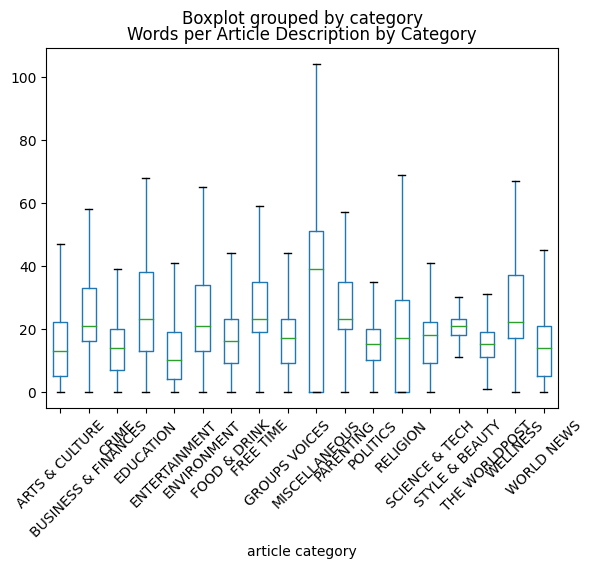

In [ ]:
plt.figure(figsize=(12, 6))
news_dataset.boxplot('words_per_article_description', by='category', grid=False,
           showfliers=False)
plt.xticks(rotation=45)

plt.title("Words per Article Description by Category")
plt.xlabel("article category")
plt.show()

# Tokenization

### from pandas dataframe to HF dataset

In [ ]:
df = news_dataset[['short_description','category']]

In [ ]:
df = df.rename(columns={'short_description':'text','category':'label'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    209527 non-null  object
 1   label   209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [ ]:
# Splitting the data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [ ]:
# Converting pandas DataFrames to datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Encode the 'label' column as a class label in each dataset
train_dataset = train_dataset.class_encode_column("label")
val_dataset = val_dataset.class_encode_column("label")
test_dataset = test_dataset.class_encode_column("label")

Casting to class labels:   0%|          | 0/167621 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/20953 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/20953 [00:00<?, ? examples/s]

In [ ]:
# Constructing the DatasetDict
news_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

In [ ]:
news_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 167621
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 20953
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 20953
    })
})

In [ ]:
train_ds = news_dict['train']

In [ ]:
len(train_ds)

167621

In [ ]:
train_ds[0]

{'text': "The building's residents are getting jittery about reduced values in properties linked to the twice-impeached former president.",
 'label': 11,
 '__index_level_0__': 3332}

In [ ]:
#access features of the dataset
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['ARTS & CULTURE', 'BUSINESS & FINANCES', 'CRIME', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'FOOD & DRINK', 'FREE TIME', 'GROUPS VOICES', 'MISCELLANEOUS', 'PARENTING', 'POLITICS', 'RELIGION', 'SCIENCE & TECH', 'STYLE & BEAUTY', 'THE WORLDPOST', 'WELLNESS', 'WORLD NEWS'], id=None), '__index_level_0__': Value(dtype='int64', id=None)}


In [ ]:
#access several rows within a slice
print(train_ds[:5])

{'text': ["The building's residents are getting jittery about reduced values in properties linked to the twice-impeached former president.", 'We couldn’t take our eyes off her shiny new accessory', 'If Israel wishes to be "a light unto the nations" she must put the brakes on this growing intolerant tendency towards 20 percent of its own population. The tragic consequences if she does not will be hard to stop.', "The incident at a San Antonio middle school highlights the state's youth gun violence issue, with Texas leading the U.S. in unintentional shootings by children.", 'BARCELONA, SPAIN Get your credit cards ready. We eyed round-trip flights from NYC to Barcelona for under $400 throughout'], 'label': [11, 4, 17, 2, 7], '__index_level_0__': [3332, 24930, 104193, 6000, 18391]}


## Word Tokenization

In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.4 MB/s eta 0:00:00


In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
#def tokenizer function
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

In [ ]:
print(tokenize(news_dict['train'][:2]))

{'input_ids': [[101, 1996, 2311, 1005, 1055, 3901, 2024, 2893, 10147, 12079, 2100, 2055, 4359, 5300, 1999, 5144, 5799, 2000, 1996, 3807, 1011, 17727, 5243, 7690, 2280, 2343, 1012, 102], [101, 2057, 2481, 1521, 1056, 2202, 2256, 2159, 2125, 2014, 12538, 2047, 25339, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
#apply the function to all splits in the corpus
news_encoded = news_dict.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/167621 [00:00<?, ? examples/s]

Map:   0%|          | 0/20953 [00:00<?, ? examples/s]

Map:   0%|          | 0/20953 [00:00<?, ? examples/s]

In [ ]:
print(news_encoded['train'].column_names)

['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask']


# Train News Classifier

## Fine-Tuning Transformers

Loading the pretrained Model

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
#load the pretrained model
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
num_labels = 18
model = (AutoModelForSequenceClassification.
         from_pretrained(model_ckpt,num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
#the function extracts the model's predictions from the pred object and calculates the class
#with the highest predicted probability for each data point.
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

Train the Model

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()
#user access toke, mod:WRITE (not READ)

In [ ]:
import transformers

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [ ]:
import accelerate

In [ ]:
accelerate.__version__

'0.24.1'

In [ ]:
transformers.__version__, accelerate.__version__

('4.34.1', '0.24.1')

In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
#setting up the training configurations for fine-tuning a transformer model
batch_size = 64
logging_steps = len(news_encoded["train"]) // batch_size #how often training logs are generated
model_name = f"{model_ckpt}-finetuned-emotion" #the output directory where the fine-tuned model and related artifacts will be saved
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [5]:
#instatiate and fine-tune the model
from transformers import Trainer

In [ ]:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=news_encoded["train"],
                  eval_dataset=news_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.565900,1.390912,0.567604,0.554205
2,1.321700,1.363691,0.576242,0.564111
